In [1]:
import geopandas as gpd
import geoplot
import matplotlib
import pandas as pd
from shapely.geometry import Point
import matplotlib.ticker as mtick

In [2]:
mob = pd.read_csv('data/dataset_public.csv')
mob.head()

,organization_name,discipline_name,grid_id,discipline_id,number_researchers,pct_insiders,pct_domesticoutsiders,pct_foreignoutsiders,grid_country_code,established_year,country_name,geo_region,continent,latitude,longitude
0,Australian National University,Earth Sciences,grid.1001.0,4,173,35.838150,23.699423,40.462429,AU,1946,Australia,Oceania,Oceania,-35.2778,149.1205
1,Australian National University,All,grid.1001.0,99,2706,38.137470,23.983740,37.878788,AU,1946,Australia,Oceania,Oceania,-35.2778,149.1205
2,Australian National University,Physical Sciences,grid.1001.0,2,309,35.922329,15.857606,48.220066,AU,1946,Australia,Oceania,Oceania,-35.2778,149.1205
3,Australian National University,"Commerce, Management, Tourism and Services",grid.1001.0,15,57,40.350880,22.807016,36.842106,AU,1946,Australia,Oceania,Oceania,-35.2778,149.1205
4,Australian National University,Agricultural and Veterinary Sciences,grid.1001.0,7,45,44.444447,26.666668,28.888889,AU,1946,Australia,Oceania,Oceania,-35.2778,149.1205


In [10]:
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
geo_mob = gpd.GeoDataFrame(mob[mob.discipline_name == 'All'], geometry = mob.apply(lambda row: Point(row.longitude, row.latitude),axis=1)).set_crs('EPSG:4326')
geo_mob

,organization_name,discipline_name,grid_id,discipline_id,number_researchers,pct_insiders,pct_domesticoutsiders,pct_foreignoutsiders,grid_country_code,established_year,country_name,geo_region,continent,latitude,longitude,geometry
1,Australian National University,All,grid.1001.0,99,2706,38.137470,23.983740,37.878788,AU,1946,Australia,Oceania,Oceania,-35.277800,149.120500,POINT (149.12050 -35.27780)
32,Monash University,All,grid.1002.3,99,5672,30.042315,40.056416,29.901270,AU,1958,Australia,Oceania,Oceania,-37.908300,145.138000,POINT (145.13800 -37.90830)
39,University of Liverpool,All,grid.10025.36,99,2790,32.007172,42.580647,25.412188,GB,1882,United Kingdom,Western and Northern Europe,Europe,53.406115,-2.965604,POINT (-2.96560 53.40611)
71,University of Queensland,All,grid.1003.2,99,6424,38.153797,27.381695,34.464508,AU,1909,Australia,Oceania,Oceania,-27.495964,153.009627,POINT (153.00963 -27.49596)
80,Macquarie University,All,grid.1004.5,99,2041,26.702599,39.931408,33.365997,AU,1964,Australia,Oceania,Oceania,-33.775259,151.112915,POINT (151.11291 -33.77526)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,University of Leeds,All,grid.9909.9,99,3498,36.992569,40.909092,22.098341,GB,1904,United Kingdom,Western and Northern Europe,Europe,53.807222,-1.551667,POINT (-1.55167 53.80722)
11518,University of Leicester,All,grid.9918.9,99,1432,34.078213,41.689945,24.231844,GB,1957,United Kingdom,Western and Northern Europe,Europe,52.621321,-1.124664,POINT (-1.12466 52.62132)
11529,AGH University of Science and Technology,All,grid.9922.0,99,1251,78.497200,15.667465,5.835331,PL,1919,Poland,Central and Eastern Europe,Europe,50.067161,19.913276,POINT (19.91328 50.06716)
11541,Johannes Kepler University of Linz,All,grid.9970.7,99,728,49.725273,18.406593,31.868134,AT,1966,Austria,Western and Northern Europe,Europe,48.337500,14.317500,POINT (14.31750 48.33750)


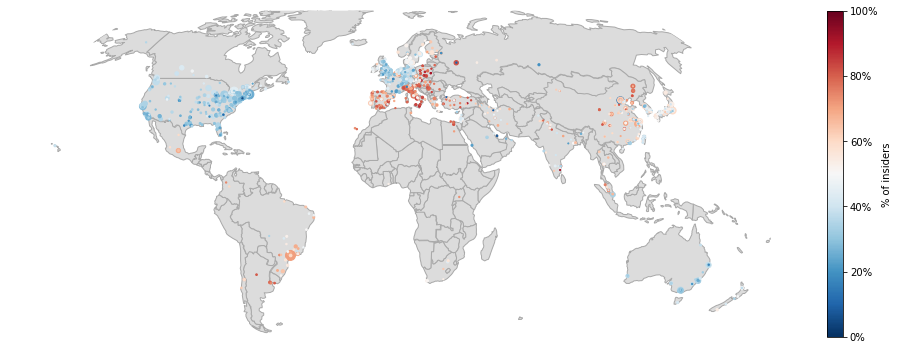

In [11]:
ax = geoplot.polyplot(world,projection=geoplot.crs.Robinson(),figsize=(20,6),edgecolor='darkgrey',facecolor='gainsboro')

geoplot.pointplot(
    geo_mob[geo_mob.latitude.notna()], 
    projection=geoplot.crs.Robinson(),
    hue='pct_insiders', 
    cmap='RdBu_r',
    norm=norm,
    legend=True,
    ax=ax,
    vmin=0,vmax=1,
    scale='number_researchers',limits=(1,10),
    legend_var='hue',
    legend_kwargs={
        'format':mtick.PercentFormatter(100.0),
        'label': "% of insiders",
    }
);

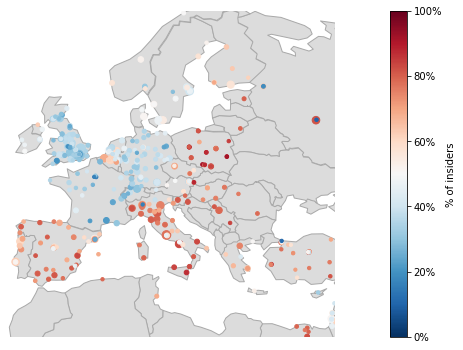

In [13]:
ax = geoplot.polyplot(world,projection=geoplot.crs.Robinson(),figsize=(20,6),edgecolor='darkgrey',facecolor='gainsboro')

geoplot.pointplot(
    geo_mob[geo_mob.latitude.notna()], 
    projection=geoplot.crs.Robinson(),
    hue='pct_insiders', 
    cmap='RdBu_r',
    norm=norm,
    legend=True,
    ax=ax,
    vmin=0,vmax=1,
    scale='number_researchers',limits=(3,15),
    legend_var='hue',
    legend_kwargs={
        'format':mtick.PercentFormatter(100.0),
        'label': "% of insiders",
    },
    extent=(-10,30,35,70) #(min_longitude, min_latitude, max_longitude, max_latitude) 
);

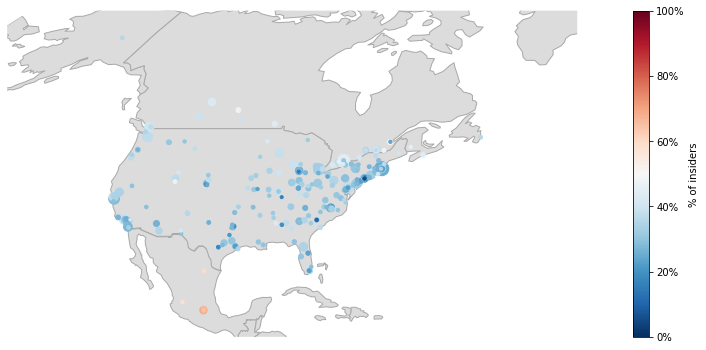

In [16]:
ax = geoplot.polyplot(world,projection=geoplot.crs.Robinson(),figsize=(20,6),edgecolor='darkgrey',facecolor='gainsboro')

geoplot.pointplot(
    geo_mob[geo_mob.latitude.notna()], 
    projection=geoplot.crs.Robinson(),
    hue='pct_insiders', 
    cmap='RdBu_r',
    norm=norm,
    legend=True,
    ax=ax,
    vmin=0,vmax=1,
    scale='number_researchers',limits=(3,15),
    legend_var='hue',
    legend_kwargs={
        'format':mtick.PercentFormatter(100.0),
        'label': "% of insiders",
    },
    extent=(-135,15,-40,70) #(min_longitude, min_latitude, max_longitude, max_latitude) 
);